# 【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。

サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [94]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [95]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [96]:
# ndarray２×2で表現
reshape_small_board_ndarray = small_board_ndarray.reshape(2, 2)
print(reshape_small_board_ndarray)

[[1 2]
 [4 8]]


# 【問題2】n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [125]:
def komugi_num(n, m):
    n_squares = n * m
    small_board_list = [1]
    for _ in range(n_squares - 1):
        small_board_list.append(2*small_board_list[-1])
    
    small_board_ndarray = np.array(small_board_list)
    
    reshape_small_board_ndarray = small_board_ndarray.reshape(n, m)
    print(reshape_small_board_ndarray)
    
    return reshape_small_board_ndarray

In [268]:
#8×8マスのチェス盤での小麦の数

chess = komugi_num(8, 8)

[[1.0000000000000000e+00 2.0000000000000000e+00 4.0000000000000000e+00
  8.0000000000000000e+00 1.6000000000000000e+01 3.2000000000000000e+01
  6.4000000000000000e+01 1.2800000000000000e+02]
 [2.5600000000000000e+02 5.1200000000000000e+02 1.0240000000000000e+03
  2.0480000000000000e+03 4.0960000000000000e+03 8.1920000000000000e+03
  1.6384000000000000e+04 3.2768000000000000e+04]
 [6.5536000000000000e+04 1.3107200000000000e+05 2.6214400000000000e+05
  5.2428800000000000e+05 1.0485760000000000e+06 2.0971520000000000e+06
  4.1943040000000000e+06 8.3886080000000000e+06]
 [1.6777216000000000e+07 3.3554432000000000e+07 6.7108864000000000e+07
  1.3421772800000000e+08 2.6843545600000000e+08 5.3687091200000000e+08
  1.0737418240000000e+09 2.1474836480000000e+09]
 [4.2949672960000000e+09 8.5899345920000000e+09 1.7179869184000000e+10
  3.4359738368000000e+10 6.8719476736000000e+10 1.3743895347200000e+11
  2.7487790694400000e+11 5.4975581388800000e+11]
 [1.0995116277760000e+12 2.1990232555520000e+

# 【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

棒グラフはサンプルコードを用意しています。

In [269]:
# チェス盤の小麦の合計
total_komugi = chess.sum()
print('チェス盤の小麦の合計：%d粒' %total_komugi)

チェス盤の小麦の合計：18446744073709551616粒


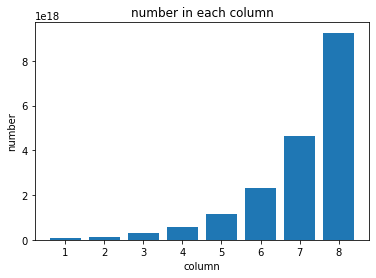

In [270]:
# 各列の平均を求め、それを棒グラフで可視化
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), chess.sum(0))
plt.show()

# 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。

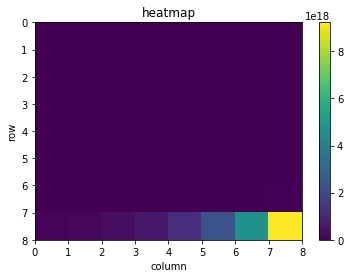

In [271]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chess)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

# 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [272]:
# チェスの前半
chess_first_half = chess[:round(len(chess)/2), :]

# チェスの後半
chess_second_half = chess[round(len(chess)/2):, :]

print('前半の小麦は：{}粒'.format(chess_first_half.sum()))
print('前半の小麦は：%d粒' %chess_second_half.sum())
print('後半の数は前半の{:.1f}倍'.format(chess_second_half.sum() / chess_first_half.sum()))

前半の小麦は：4294967295.0粒
前半の小麦は：18446744069414584320粒
後半の数は前半の4294967296.0倍


# 【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。

それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [273]:
def komugi_num_other(n, m):
    
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    
    reshape_board_ndarray = board_ndarray.reshape(n, m)
    print(reshape_board_ndarray)
    
    return reshape_board_ndarray

In [274]:
#8×8マスのチェス盤での小麦の数
chess2 = komugi_num_other(8, 8)

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

# 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。

%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [313]:
%%timeit

# 問２の関数
def komugi_num(n, m):
    n_squares = n * m
    small_board_list = [1]
    for _ in range(n_squares - 1):
        small_board_list.append(2*small_board_list[-1])
    
    small_board_ndarray = np.array(small_board_list)
    
    reshape_small_board_ndarray = small_board_ndarray.reshape(n, m)
    
    return reshape_small_board_ndarray

test = komugi_num(8, 8)

13.7 µs ± 368 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [314]:
%%timeit

# サンプルコード（np.append()）
n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])

board_ndarray_unit64 = board_ndarray.astype(np.uint64)

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


226 µs ± 3.43 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [315]:
%%timeit

# サンプルコード（ブロードキャスト）
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares

2.68 µs ± 91.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


* 比較と考察の記述  
ブロードキャストを用いた方法が一番早く、ndarrayへのfor + appendが一番遅い。  
ndarrayでの計算に加えforの繰り返しで計算コストが高くなる。  
今回の場合、forプログラムで比較するとndarrya有りの方が無しに比べ１０倍計算に時間がかかっている。